<h1 style="text-align: center;">"Optimizing Airbnb Listings in Bangkok:<br> A Data-Driven Approach to Boost Bookings and Revenue"</h1>
<h3 style="text-align: center;">Melin Ayu Safitri</h3>

---

## **1. Business Context**

### **1.1. Context**
Airbnb has become a dominant platform for short-term rentals, connecting hosts with travelers seeking affordable and unique accommodations. In cities like Bangkok, where tourism is booming, the competition among Airbnb listings is fierce. Hosts are continuously striving to optimize their listings to improve occupancy rates and revenue. To remain competitive, hosts need to understand key factors such as pricing trends, seasonal fluctuations, guest preferences, and competitor behaviors. Insights derived from data can help Airbnb hosts in Bangkok make informed decisions to stand out in this crowded market.

### **1.2. Problem Statements**
The rapidly growing Airbnb market in Bangkok presents significant challenges for hosts looking to maximize their listings' visibility, bookings, and profitability. Key factors influencing success include geospatial competition, seasonal demand fluctuations, and policies related to room types and minimum stay requirements. First, the concentration of Airbnb listings within specific neighborhoods could lead to increased competition, making it essential to understand how listing density impacts a host’s competitive position. Secondly, hosts need strategies to adjust pricing and availability according to seasonal demand and competitive pricing pressures. Finally, the type of room offered and the minimum stay policy can significantly influence booking patterns. Understanding the relationship between these variables is crucial for hosts to optimize their listings and stay competitive in a dynamic market. Addressing these issues will provide actionable insights to improve host performance and market strategy.

### **1.3. Key Objective.**
1. **Geospatial Competition and Listings Density**: Investigate how the concentration of Airbnb listings in specific neighborhoods affects the level of competition among hosts.

2. **Optimize Pricing and Availability:** Develop strategies for hosts to adjust their pricing and availability based on seasonal demand fluctuations and competitive pricing.

3. **Evaluate impact of Room Type and Minimum Stay Policy:** Understand how different room types and minimum stay policies influence the total number of bookings on Airbnb.

## **2. Data Understanding**<br>

### **2.1. General Information**

Before performing data analysis, it's crucial to first familiarize with the dataset. This involves reviewing the data structure, understanding the types of variables present, and checking for missing values or any discrepancies. Descriptive statistics are helpful for gaining an initial understanding of the data's distribution and range. Once this overview is complete, the next step is data cleaning, which involves addressing any issues such as null values, duplicates, or inconsistent formatting. This process ensures the data is well-prepared, accurate, and suitable for in-depth analysis, ultimately leading to more reliable results.

- The dataset likely consists of various features related to each Airbnb listing in Bangkok, such as room type, price, minimum stay policy, reviews, and host information.
- The number of rows represents the individual Airbnb listings, and the columns provide detailed attributes about each listing, which are crucial for understanding the business and trends in the market.

### **2.2. Feature Information**
Below are the columns in the dataset along with their descriptions:

- **id**	                          : Airbnb's unique identifier for the listing.
- **name**                            : Name of the listing.
- **host_id**                         : Airbnb's unique identifier for the host/user.
- **host_name**                       : Name of the host, usually just the first name(s).
- **neighbourhood**                   : The neighborhood is geocoded using the latitude and
longitude against neighborhoods as defined by open or public
digital shapefiles.
- **latitude**                        : Latitude of the listing (WGS84 projection).
- **longitude**                       : Longitude of the listing (WGS84 projection).
- **room_type**                       : All homes are grouped into the following four room types -> Entire home/apt, Private room, Shared room and Hotel room.
- **price**                           : Daily price in local currency. Note, the $ sign may be used
despite the locale.
- **minimum_nights**                  : The minimum number of night stays for the listing (calendar
rules may differ).
- **number_of_reviews**               : Total number of reviews the listing has.
- **last_review**                     : Date of the last/newest review.
- **calculated_host_listings_count**  : The number of listings the host has in the current scrape in
the city/region geography.
- **availability_365**                : Avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.
- **number_of_reviews_ltm**           : Number of reviews the listing has in the last 12 months.

### **2.3. Statistics Summary**
In order to fully understand the dataset, **statistics summary** is carried out. First, we will determine the number of rows and columns in the dataset.

In [1]:
# Importing required libraries

# Library for data cleaning and data manipulation
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Library for normality test
import scipy.stats as stats

In [2]:
# Load the dataset using csv format
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Airbnb-Listings-Bangkok-Project\data\raw\Airbnb Listings Bangkok.csv")

# Displays the first 5 rows of the dataframe
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [3]:
# Displays the number of rows and columns
print(f'number of rows and columns in the data:',df.shape)

number of rows and columns in the data: (15854, 17)


**Insight** :<br> It was found that the data set consisted of **15,854 rows** and **17 columns**. 

In [4]:
# Provides concise information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**From the information above we get insight:**<br>
1. Some columns have missing values, including '**name**', '**host_name**', '**last_review**', and '**reviews_per_month**', as their non-null counts are lower than the total of 15,854 entries
2. An inconsistency was found in the data types, particularly with the '**last_review**' column, which is currently categorized as an object. This column needs to be converted to a datetime format


In [5]:
# Displays the number of unique values ​​from a column
df.loc[:,:].nunique()

Unnamed: 0                        15854
id                                15854
name                              14794
host_id                            6659
host_name                          5312
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

**Insight** :<br>
1. The dataset contains 15,854 listings with unique id values
2. There are 50 unique neighbourhoods and 4 room types, providing a broad geographic and accommodation type coverage

## **3. Data Cleaning**<br>
Prior to performing any data analysis, it is crucial to fully comprehend and prepare the dataset. This includes reviewing the dataset’s structure, identifying the types of variables, and identifying any missing or inconsistent data. Once initial insights are obtained through descriptive statistics, data cleaning is carried out to resolve any issues, such as missing data or inconsistencies. This process ensures that the dataset is accurate, complete, and suitable for dependable analysis.<br>

### **3.1. Drop Unnecessary Column**<br>
To simplify the dataset and focus on the most important information, unnecessary columns that do not add value to the analysis will be eliminated.<br>
In particular, the column **'Unnamed'** will be removed because as an index from a previously saved file and does not contain any valuable information

In [6]:
# Drop unnecessary columns from the dataset
df.drop(columns=["Unnamed: 0"], inplace=True)

# Verifying if the columns are already dropped or not
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


### **3.2. Missing Values**<br>
To identifying whether any data is missing or unavailable in a dataset. Missing data often appears as empty or unfilled cells in certain columns, typically represented by symbols such as NaN (Not a Number) or null.

It is important to check for missing values because they can impact the results of analysis or models being developed. If not handled properly, missing data can lead to errors in calculations, inaccuracies in models, or bias in the analysis.

#### **3.2.1. checking Missing Values**

In [7]:
# checking for missing values
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
# Calculating the percentage of missing values from every columns
round(df.isna().sum()/len(df)*100, 3)

id                                 0.000
name                               0.050
host_id                            0.000
host_name                          0.006
neighbourhood                      0.000
latitude                           0.000
longitude                          0.000
room_type                          0.000
price                              0.000
minimum_nights                     0.000
number_of_reviews                  0.000
last_review                       36.521
reviews_per_month                 36.521
calculated_host_listings_count     0.000
availability_365                   0.000
number_of_reviews_ltm              0.000
dtype: float64

From the data above, several key observations can be made:<br>
1. The "**name**" column has 8 missing values and the "**host_name**" column has 1 missing value. These are minor issues that can be easily addressed with simple methods.
2. The "**last_review**" and "**reviews_per_month**" columns show substantial missing data, with 5,789 entries missing in each "**36.52%**" of the data. This likely reflects listings that have not received reviews or where the data was not recorded.

#### **3.2.2. Handling Missing Values (name & host_name columns)**

Replace column with the placeholder "**unknown**". There are several reasons why the '**name**' and '**host_name**' columns in the data should be replaced (with a placeholder such as "**unknown**") rather than deleted:
1. **Preservation of Data Structure**: Deleting the columns could disrupt the data structure and reduce the amount of information available in the dataset. By replacing missing values with a placeholder, we retain all columns, ensuring the consistency and completeness of the dataset's structure.
2. **Consistency in Handling Missing Data**: Replacing missing values with a placeholder like "**unknown**" provides a consistent approach for handling missing data, while deleting the column would remove data that may not need processing or could be used later.

In [9]:
# Replacing missing values in 'name' and 'host_name' columns with 'Unknown'
df["name"] = df["name"].fillna("Unknown")
df["host_name"] = df["host_name"].fillna("Unknown")

In [10]:
# Confirm the adjustments by checking for any remaining missing values.
df[["name", "host_name"]].isna().sum().reset_index().rename(columns={"index": "column", 0: "missing values"})

,column,missing values
0,name,0
1,host_name,0


#### **3.2.3. Handling Missing Values (last_review & reviews_per_month columns)**

<Axes: >

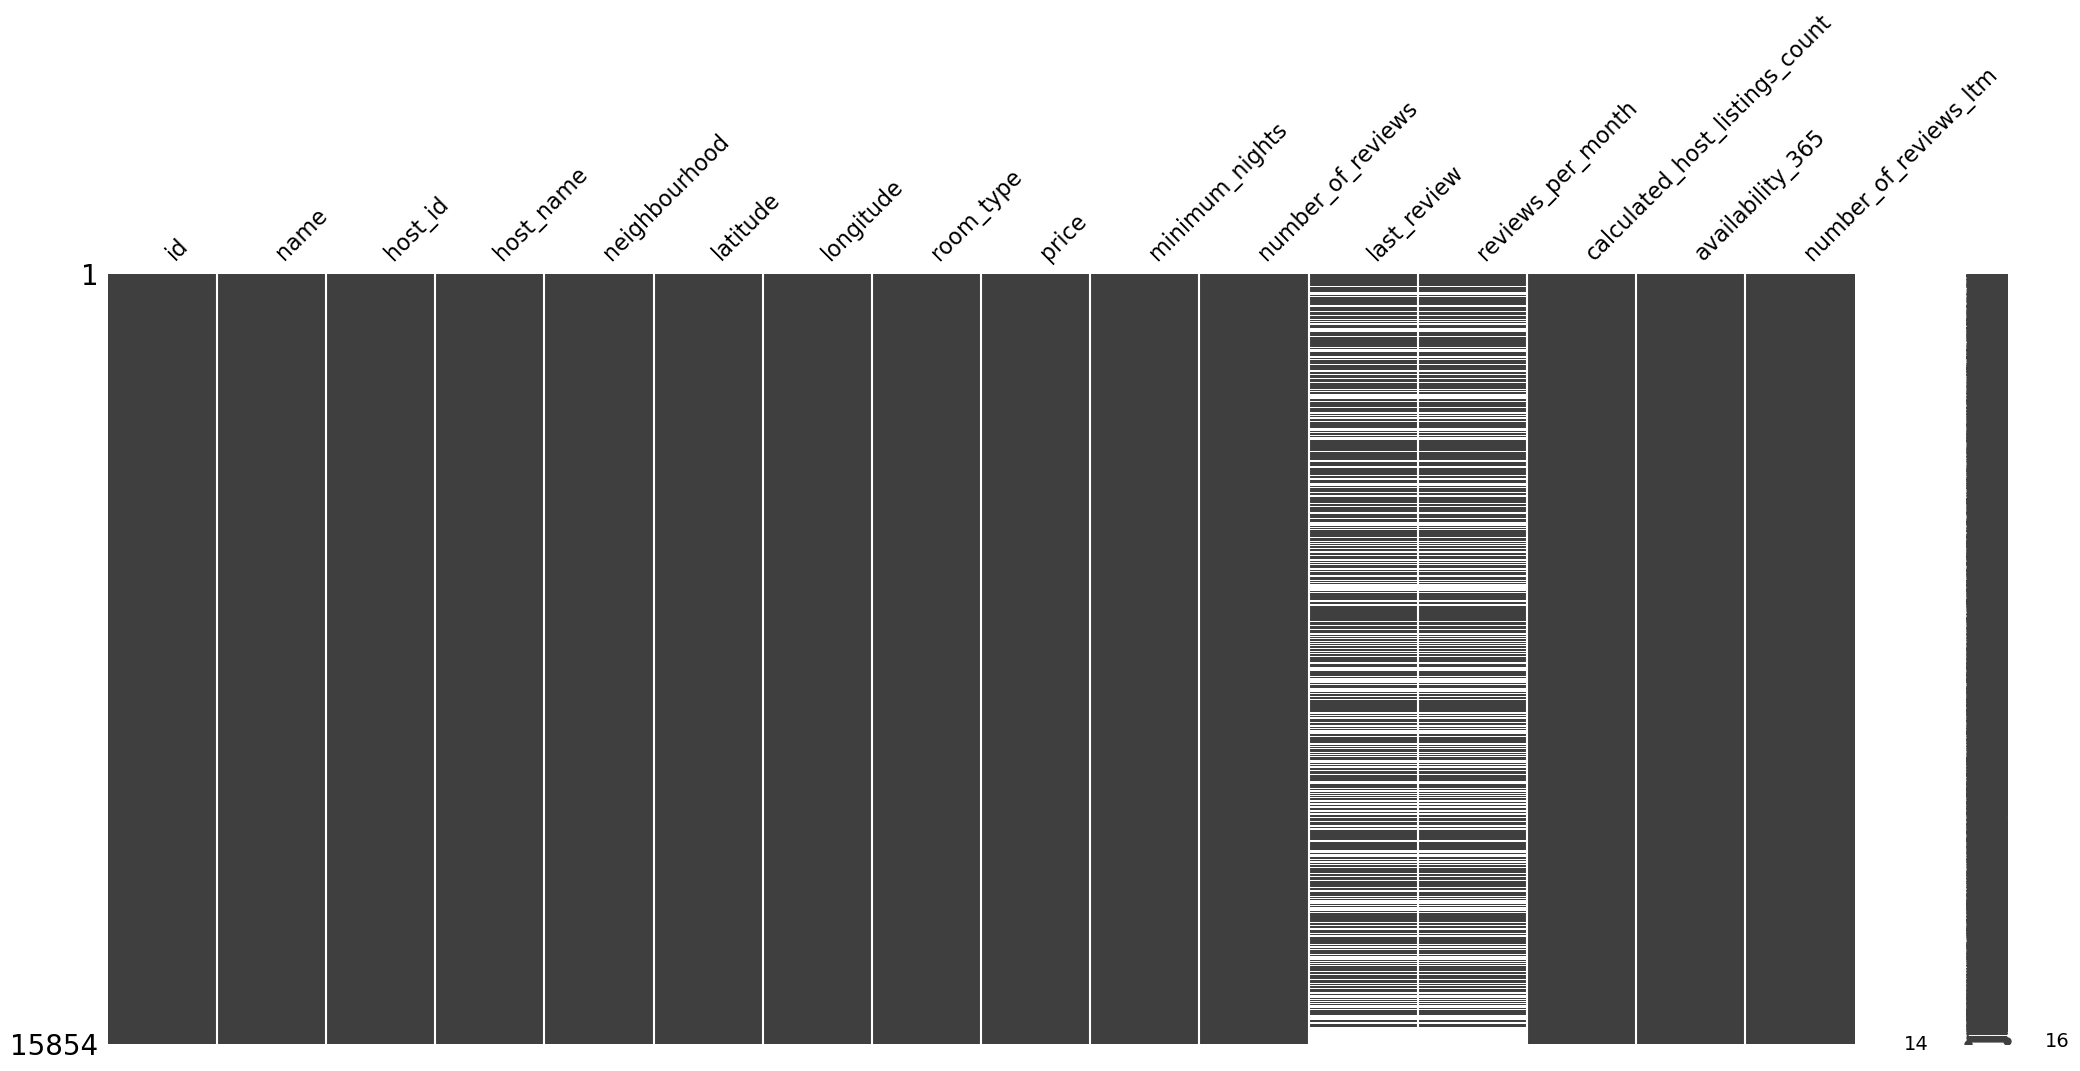

In [11]:
# Visualization of missing values
# Matrix 
import missingno
missingno.matrix(df)

**Insight** : as the matrix above suggests that they are aligned in the same rows.<br>

**Assumption**:<br>
 the '**number_of_reviews**' column will show the value '**0**' if these values ​​do not exist. This suggests that the lack of reviews for this listing is the reason behind the missing values ​​in '**last_review**' and '**reviews_per_month**'.

In [12]:
# Verifying if the above assumption holds true.
df[df['number_of_reviews']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**The number of rows stays the same at 5,790** confirming that the missing values are indeed caused by the lack of reviews for these listings. To resolve this, the missing values in the '**reviews_per_month**' column can be replaced with "**0**", and a default datetime value will be assigned to the '**last_review**' column, as it is expected to be in a datetime format. This method ensures that the dataset remains consistent and prepared for further analysis.

In [13]:
# Fill the missing values in 'reviews_per_month' with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [14]:
# Fill the missing values in 'last_review' with 0
df['last_review'] = df['last_review'].fillna(0)

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [16]:
df['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15854 entries, 0 to 15853
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
10064 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 124.0 KB


In [17]:
# Confirm the adjustments by checking for any remaining missing values.
df[["last_review", "reviews_per_month"]].isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Values"})

,Column,Missing Values
0,last_review,5790
1,reviews_per_month,0


***The 'missing values' has been successfully addressed***

### **3.3. Duplicated Values**

 Checking for duplicate data is an essential step to ensure more accurate, efficient, and reliable analysis, as well as to maintain the quality and integrity of the dataset used.

In [18]:
# Verifying for duplicate entries throughout the entire dataset
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [19]:
# Verifying duplicates based on the 'id' column, since each listing should have a distinct identifier
df.duplicated(["id"]).sum()

0

***I have verified that the dataset contains no duplicate entries***

### **3.4. Identify Anomaly Values**

To improve data quality, enhances analysis accuracy, prevents biased results, and uncovers valuable insights. It ensures that decisions made based on the data are well-informed, reliable, and actionable.

#### **3.4.1. Checking Anomalies**

In [20]:
# Descriptive statistics of numerical data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.516178,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,0.952753,30.269848,125.843224,8.916937


In [21]:
# Descriptive statistics of categorical data
df.describe(include=["object"])

,name,host_name,neighbourhood,room_type
count,15854,15854,15854,15854
unique,14795,5313,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


**Insight**:<br>
The descriptive statistics show an anomaly in the '**price**' feature, with a minimum value of 0. Clearly, a rental price of 0 is unrealistic.


#### **3.4.2. Handling Anomalies**

In [22]:
# Display the price column with a minimum value of 0
df[df["price"] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,0.0,1,0,0


The analysis found that index 11103 has a value of 0 in the 'price' column. The next step is to delete this row.

In [23]:
df.drop(index=11103, inplace=True)

In [24]:
# verifying whether the row has been successfully deleted
display(df.shape, df[df["price"] == 0])

(15853, 16)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


As noted, the total number of rows has reduced by 1 from the original count of 15,854

In [25]:
df.to_csv('data_cleaned.csv', index=False)

## **4. Analytics**<br>

In [26]:
# Load the Dataset
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Airbnb-Listings-Bangkok-Project\data\cleaned\data_cleaned.csv")

In [27]:
# Drop unnecessary columns from the dataset
df.drop(columns=["id", "host_id"], inplace=True)

**Normality Assumption**

In [28]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

normality_test_results = {}

num_cols = len(numerical_columns)

rows = (num_cols + 2) // 3

for i, col in enumerate(numerical_columns):

    # Perform the Shapiro-Wilk Test for normality
    shapiro_test = stats.shapiro(df[col])

    # Calculate the skewness
    skewness = df[col].skew()

    # Determine the skew direction
    if skewness > 0:
        skew_direction = "Positive"
    elif skewness < 0:
        skew_direction = "Negative"
    else:
        skew_direction = "None"

    # Storing the results
    normality_test_results[col] = {
        "Shapiro-Wilk Statistic": shapiro_test.statistic,
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "Skewness": skewness,
        "Skew Direction": skew_direction
    }

# Convert the dictionary to a DataFrame
normality_results_df = pd.DataFrame(normality_test_results).T

# Adding a column to indicate if the data is normally distributed based on p-values
normality_results_df["Normally Distributed"] = (normality_results_df["Shapiro-Wilk p-value"] > 0.05)

normality_results_df

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15853.
  res = hypotest_fun_out(*samples, **kwds)


,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Skewness,Skew Direction,Normally Distributed
latitude,0.90341,0.0,1.401384,Positive,False
longitude,0.95221,0.0,0.559228,Positive,False
price,0.044418,0.0,33.882198,Positive,False
minimum_nights,0.279787,0.0,8.229398,Positive,False
number_of_reviews,0.441057,0.0,6.261361,Positive,False
reviews_per_month,0.579128,0.0,4.628295,Positive,False
calculated_host_listings_count,0.417437,0.0,5.386583,Positive,False
availability_365,0.832341,0.0,-0.576219,Negative,False
number_of_reviews_ltm,0.411577,0.0,9.725723,Positive,False


**Insight** : "All features in the data do not meet the normality assumption."

**Outlier Analysis**

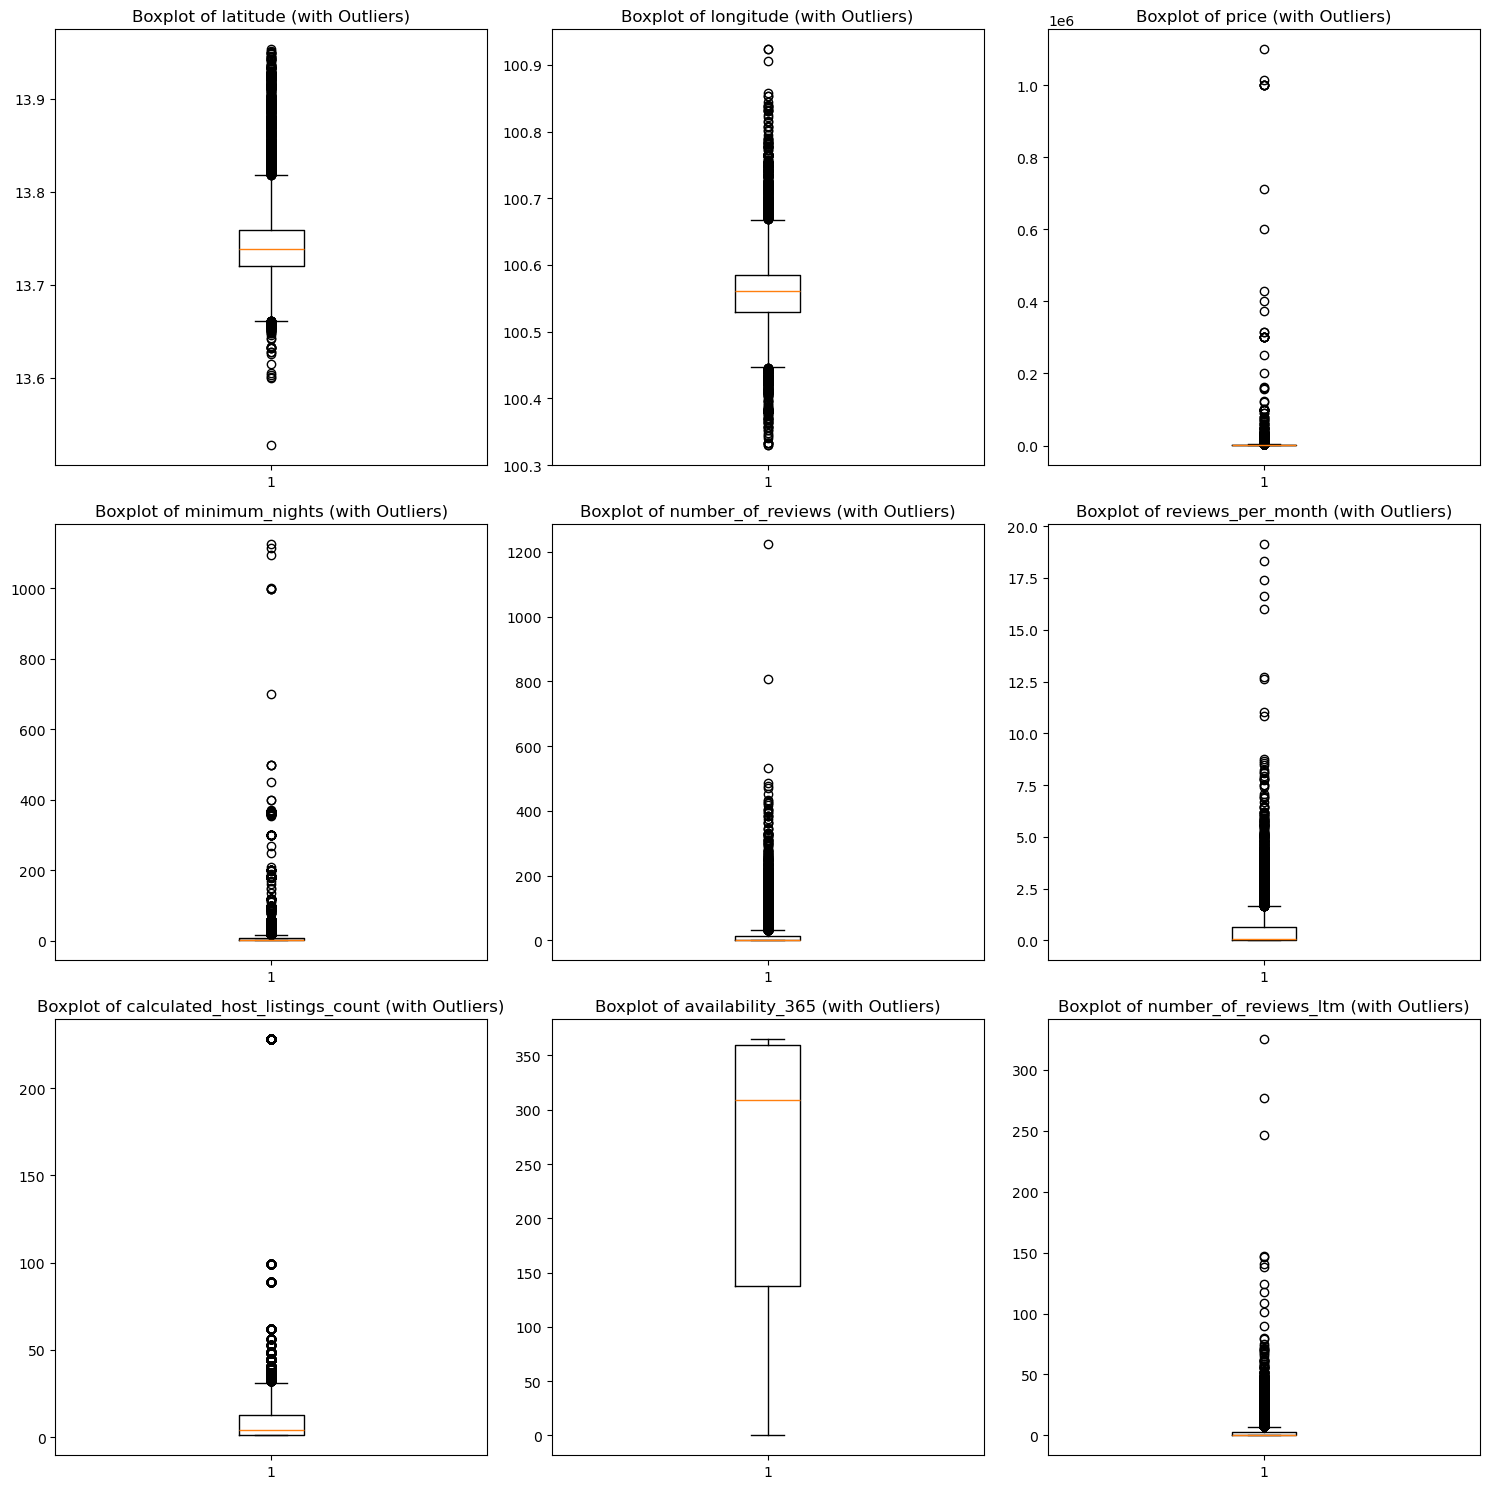

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,latitude,1094,6.900902,13.660975,13.818615
1,longitude,602,3.797389,100.446500,100.668340
2,price,1403,8.850060,-1393.500000,4722.500000
3,minimum_nights,3168,19.983599,-8.000000,16.000000
4,number_of_reviews,2240,14.129818,-19.500000,32.500000
5,reviews_per_month,1471,9.279001,-1.005000,1.675000
6,calculated_host_listings_count,1832,11.556172,-17.000000,31.000000
7,availability_365,0,0.000000,-195.000000,693.000000
8,number_of_reviews_ltm,2219,13.997351,-4.500000,7.500000


In [29]:
# Define numerical columns to include in the analysis (ensure these are numeric)
numerical_columns = df.select_dtypes(include=['number']).columns

# Initialize dictionary to store outliers
outliers_dict = {}

# Set up the number of rows and columns for the subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# List to hold summary data about outliers
summary_data = []

# Iterate over each numerical column to detect outliers and generate boxplots
for i, column in enumerate(numerical_columns):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers
    
    total_outliers = outliers.shape[0]
    percentage = (total_outliers / df.shape[0]) * 100
    
    summary_data.append({
        "Column": column,
        "Total Outliers": total_outliers,
        "Percentage (%)": percentage,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

    axes[i].set_title(f"Boxplot of {column} (with Outliers)")
    axes[i].boxplot(df[column].dropna())

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create DataFrame to display the outliers summary
outliers_summary_df = pd.DataFrame(summary_data)
outliers_summary_df


**Insight:**<br>
Outliers can reflect unique or highly sought-after properties within certain market segments. For instance, Airbnb listings with very high or very low prices may represent luxury properties or accommodations priced very affordably, which may appeal to specific types of guests. Dropping these outliers would ignore market segments that provide a more complete picture of the market dynamics.

### **4.1. Geospatial Competition and Listing Density**

### **4.2. Optimize Pricing and Availability**

### **4.3. Evaluate Impact of Room Type and Minimum Stay Policy**

## **5. Conclusion and Recommendation**

### **5.1. Conclusion**

#### **5.1.1. Based on geospatial Competition and Listing Density**
- To optimize Airbnb listings in Bangkok, hosts should target high-demand central districts like Sukhumvit, Silom, and Siam with premium accommodations, while diversifying offerings in non-central areas to attract budget-conscious travelers. Listings near key tourist spots and airports should highlight convenience features, and pricing strategies should be adjusted during peak periods like graduation season. These actions can help maximize occupancy rates and cater to different guest preferences, ultimately enhancing competitiveness in a dynamic market.

#### **5.1.2. Based on Optimaze Pricing and Availability**
- Hosts should adjust their pricing strategies to align with seasonal demand, raising rates during high-demand months like December and offering discounts during off-peak months like April and June. Monitoring availability trends and adjusting booking policies can help maximize occupancy, while using dynamic pricing tools can ensure competitiveness by automatically adjusting prices based on market factors. These strategies can help hosts optimize their pricing and availability for better performance year-round.


#### **5.1.3. ased on Evaluate Impact of Room Type and Minimum Stay Policy**
- To optimize Airbnb listings, hosts should tailor their offerings to the type of room and target market. Hosts with Entire Homes/Apartments should consider offering longer-term stays and include family-friendly amenities, while those with Private Rooms or Shared Rooms should cater to budget-conscious or short-term travelers. Adjusting minimum stay requirements to allow flexibility and offering discounts for longer bookings can also enhance competitiveness. Additionally, maintaining short and flexible minimum night stays for hotel rooms can attract guests in urban areas where short-term stays are in high demand. These strategies will help hosts increase occupancy rates and appeal to a broader range of guests.

### **5.2. Recommendation**

#### **5.2.1. Based on geospatial Competition and Listing Density**
- **Target Central Districts with High Demand:**<br> Hosts in central districts such as Sukhumvit, Silom, and Siam should consider offering more premium accommodations, such as entire home/apartments (red markers), as these areas show high demand from tourists and business travelers. Since these regions are tourist-heavy and business-centric, premium pricing strategies might work well, especially during peak travel seasons.<br>
**Action:** Focus on attracting tourists by offering amenities that cater to short-term stays (e.g., tourist guides, airport transfers, and proximity to shopping malls or restaurants).

- **Diversify Listings in Non-Central Areas:**<br> For areas outside the central business district (e.g., Bang Kapi, Lat Phrao), consider listing private rooms (green markers) to cater to budget-conscious travelers, such as solo tourists, students, or longer-term guests. These areas may have slightly lower pricing but could offer high occupancy rates for budget travelers.<br>
**Action:** Offer additional long-term stay discounts or features that appeal to students or solo travelers, such as workspaces, study areas, and easy access to public transportation.

- **Optimize Listings Near Tourist Spots and Airports:**<br> Areas near key tourist spots like the Grand Palace and Wat Arun, as well as airports (Suvarnabhumi, Don Mueang), should offer convenience features such as easy check-ins/check-outs, airport shuttles, or partnerships with local tour operators. Listings in these areas could benefit from higher pricing, especially if they cater to tourists seeking convenience and easy access to attractions.<br>
**Action:** Highlight proximity to tourist destinations in listings and consider offering guided tours, transportation services, or local experiences that appeal to tourists.

- **Adjust Pricing During Graduation Season:**<br> Graduation periods usually result in increased demand, which offers an opportunity to adjust your pricing. Prices near graduation dates can be significantly higher, so adjusting rates to match this demand is important.

#### **5.2.2. Based on Optimize Pricing and Availability**
- **Seasonal Pricing Strategy:**<br>Hosts should adjust their pricing based on seasonal demand fluctuations. For example, during high-demand months like December, when prices peak and reviews increase, hosts can raise their rates. During off-peak months like April and June, when demand is lower, offering discounts or flexible pricing can attract more guests.

- **Adjust Availability to Maximize Occupancy:**<br> Hosts should monitor availability trends and adjust booking policies accordingly. For example, months like July and August, which show lower availability and higher demand, can be an opportunity to offer premium rates. Conversely, during months like October, when availability is higher, hosts can increase their offerings or reduce prices to ensure consistent bookings.

- **Dynamic Pricing Tools:**<br> To stay competitive, hosts may consider utilizing dynamic pricing tools that adjust their prices automatically based on factors such as seasonality, demand, and competitor pricing.

#### **5.2.3. Based on Evaluate Impact of Room Type and Minimum Stay Policy**
- **Optimize Room Type Offerings:**<br> Given the dominance of Entire Home/Apartments for both short and long stays, hosts with such properties should consider offering longer-term stays for better revenue potential. For hosts with Private Rooms or Shared Rooms, they should target budget-conscious travelers or shorter-term stays to ensure higher occupancy rates.

- **Adjust Minimum Stay Requirements:**<br> Hosts should take into account that short stays (1-5 nights) are the most popular. For properties that have longer minimum stays, hosts might consider offering more flexible stay policies or discounts for longer bookings to remain competitive.

- **Customize Listings for Target Market:**<br> Hosts offering Entire Homes/Apartments should enhance their listings with family-friendly amenities, as these are popular for longer stays. Hosts with Private Rooms or Shared Rooms should focus on providing affordable options with a social or shared experience to attract younger travelers or those looking for budget-friendly options.

- **Review Minimum Night Flexibility:**<br> Hosts offering Hotel Rooms may want to keep minimum stay requirements short and flexible, especially in urban areas where short-term stays are in demand.